In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def euler(f, g, y0, z0, borders, h):
    l, r = borders
    x = [i for i in np.arange(l, r + h, h)]
    y = [y0]
    z = z0

    for i in range(len(x) - 1):
        z += h * f(x[i], y[i], z)
        y.append(y[i] + h * g(x[i], y[i], z))
        
    return x, y

def runge_kutta(f, g, y0, z0, borders, h, return_z=False):
    l, r = borders
    x = [i for i in np.arange(l, r + h, h)]
    y = [y0]
    z = [z0]

    for i in range(len(x) - 1):
        K1 = h * g(x[i], y[i], z[i])
        L1 = h * f(x[i], y[i], z[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, z[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, z[i] + L3)
        delta_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
        delta_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6
        y.append(y[i] + delta_y)
        z.append(z[i] + delta_z)

    if not return_z:
        return x, y
    else:
        return x, y, z

def adams(f, g, y0, z0, borders, h):
    x_runge, y_runge, z_runge = runge_kutta(f, g, y0, z0, borders, h,
                                            return_z=True)
    x = x_runge
    y = y_runge[:4]
    z = z_runge[:4]

    for i in range(3, len(x_runge) - 1):
        z_i = z[i] + h * (55 * f(x[i], y[i], z[i]) -
            59 * f(x[i - 1], y[i - 1], z[i - 1]) +
            37 * f(x[i - 2], y[i - 2], z[i - 2]) -
            9 * f(x[i - 3], y[i - 3], z[i - 3])) / 24
        
        z.append(z_i)

        y_i = y[i] + h * (55 * g(x[i], y[i], z[i]) -
            59 * g(x[i - 1], y[i - 1], z[i - 1]) +
            37 * g(x[i - 2], y[i - 2], z[i - 2]) -
            9 * g(x[i - 3], y[i - 3], z[i - 3])) / 24
        
        y.append(y_i)

    return x, y

def runge_rombert(h1, h2, y1, y2, p):
    assert h1 == h2 * 2

    norm = 0

    for i in range(len(y1)):
        norm += (y1[i] - y2[i * 2]) ** 2
    return norm ** 0.5 / (2 ** p + 1)

def error(y1, y2):
    assert len(y1) == len(y2)
    res = 0
    for i in range(len(y1)):
        res += abs(y1[i] - y2[i])
    return res / len(y1)


In [26]:
y0 = 2 * np.e
dy0 = 2 * np.e
borders = (1, 2)
h = 0.1

f = lambda x, y, z: (1 / np.sqrt(x)) * z - (1 / (4 * x ** 2)) * (x + np.sqrt(x) - 8) * y
g = lambda x, y, z: z
exact = lambda x: (x ** 2 + 1 / x) * np.e ** np.sqrt(x)

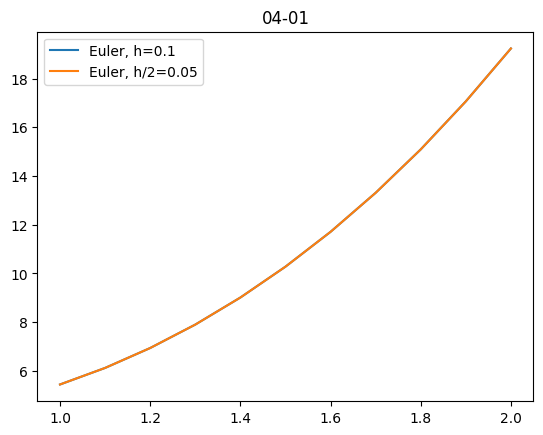

In [27]:
x_euler, y_euler = euler(f, g, y0, dy0, borders, h)
plt.plot(x_euler, y_euler, label=f"Euler, {h=}")
x_euler2, y_euler2 = euler(f, g, y0, dy0, borders, h/2)
plt.plot(x_euler, y_euler, label=f"Euler, {h/2=}")
plt.title("04-01")
plt.legend()

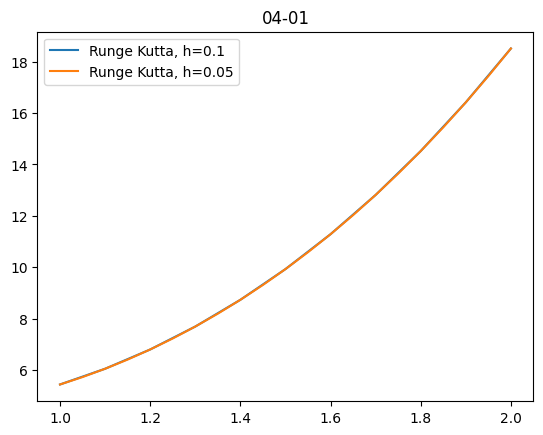

In [28]:
x_runge, y_runge = runge_kutta(f, g, y0, dy0, borders, h)
plt.plot(x_runge, y_runge, label=f"Runge Kutta, h={h}")
x_runge2, y_runge2 = runge_kutta(f, g, y0, dy0, borders, h / 2)
plt.plot(x_runge2, y_runge2, label=f"Runge Kutta, h={h/2}")
plt.title("04-01")
plt.legend()

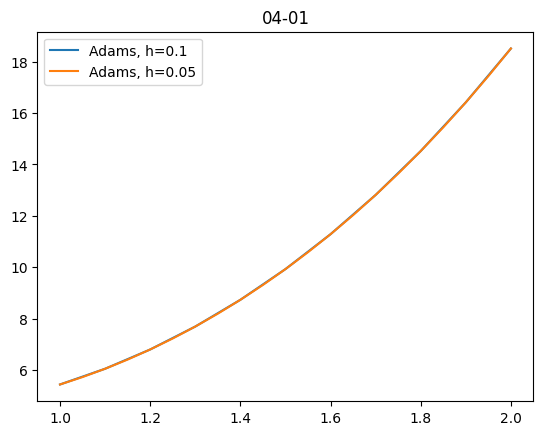

In [29]:
x_adams, y_adams = adams(f, g, y0, dy0, borders, h)
plt.plot(x_adams, y_adams, label=f"Adams, h={h}")
x_adams2, y_adams2 = adams(f, g, y0, dy0, borders, h / 2)
plt.plot(x_adams2, y_adams2, label=f"Adams, h={h/2}")
plt.title("04-01")
plt.legend()

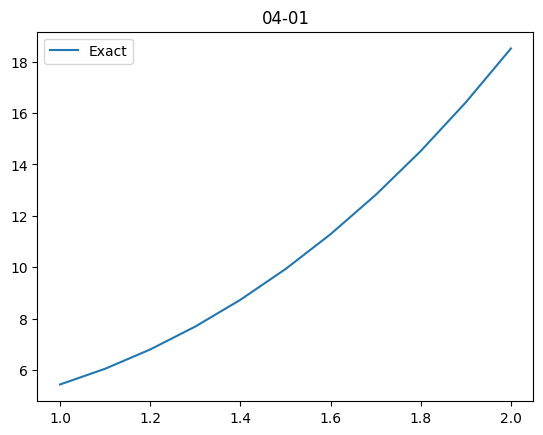

In [30]:
x_exact = [i for i in np.arange(borders[0], borders[1] + h, h)]
x_exact2 = [i for i in np.arange(borders[0], borders[1] + h / 2, h / 2)]
y_exact = [exact(x_i) for x_i in x_exact]
y_exact2 = [exact(x_i) for x_i in x_exact2]
x_exact_for_euler = [i for i in np.arange(borders[0], borders[1] + h, h)]
x_exact2_for_euler = [i for i in np.arange(borders[0], borders[1] + h / 2, h / 2)]
y_exact_for_euler = [exact(x_i) for x_i in x_exact_for_euler]
y_exact2_for_euler = [exact(x_i) for x_i in x_exact2_for_euler]
plt.plot(x_exact, y_exact, label="Exact")
plt.title("04-01")
plt.legend()
plt.show()

In [31]:
print(f"h = {h}\n")
print(f"Euler: {error(y_euler, y_exact_for_euler)}\n")
print(f"Runge Kutta: {error(y_runge, y_exact)}\n")
print(f"Adams: {error(y_adams, y_exact)}\n")
print(f"h = {h/2}\n")
print(f"Euler: {error(y_euler2, y_exact2_for_euler)}\n")
print(f"Runge Kutta: {error(y_runge2, y_exact2)}\n")
print(f"Adams: {error(y_adams2, y_exact2)}\n\n")
print(f"Runge Romberg:\n")
print(f"Euler: {runge_rombert(h, h / 2, y_euler, y_euler2, 4)}\n")
print(f"Runge Kutta: {runge_rombert(h, h / 2, y_runge, y_runge2, 4)}\n")
print(f"Adams: {runge_rombert(h, h / 2, y_adams, y_adams2, 4)}\n")

h = 0.1

Euler: 0.3539787720455733

Runge Kutta: 6.485930764587135e-06

Adams: 0.00022735122131578578

h = 0.05

Euler: 0.17779564818184973

Runge Kutta: 4.725156491689052e-07

Adams: 3.950778281972386e-05


Runge Romberg:

Euler: 0.040889247904876184

Runge Kutta: 1.646722699419312e-06

Adams: 6.379332363360413e-05

